<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/Week%206/Tugas_Week_6_Raisya_Athaya_Kamilah_101032380253_K_means_dan_Hierarchical_Clustering(Online_Retail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Inisialisasi library yang dibutuhkan untuk analisis data,visualisasi, dan penerapan metode clustering

## Importing the dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Week 6/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Membaca dataset Online Retail.xlsx dan menampilkan 5 kolom pada dataset

# Menampilkan semua baris yang bernilai null

In [ ]:
df.loc[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Berdasarkan hasil di terminal terdapat yang bernilai NaN atau null sebagian besar pada kolom CustomerID

## Menampilkan jumlah null pada setiap kolom

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Terdapat ada 135080 yang bernilai null di kolom customerID dan di kolom description terdapat 1454

# Menampilkan semua nilai unik yang terdapat di kolom CustomerID

---



In [ ]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

nilai unik dalam bentuk array numpy pada kolom CustomerID, namun yang bernilai null tidak ditampilkan pada nilai unik pada array numpy

# Mengelompokkan data pada kolom CustomerID dan InvoiceNo dan menjumlahkan kolom Quantity

In [ ]:
df.groupby(['CustomerID','InvoiceNo'])['Quantity'].sum()


CustomerID  InvoiceNo
12346.0     541431       74215
            C541433     -74215
12347.0     537626         319
            542237         315
            549222         483
                         ...  
18283.0     579673         134
            580872         142
18287.0     554065         488
            570715         990
            573167         108
Name: Quantity, Length: 22190, dtype: int64

Menampilkan yang telah dijumlah nilai Quantity pada kolom CustomerID dan InvoiceID untuk menghitung total barang yang dibeli pada setiap transaksi yang unik oleh masing-masing pelanggan

#### Mengisi yang bernilai null

In [ ]:
df['CustomerID'].fillna(method ='pad',inplace=True)

<ipython-input-65-b8b5e05c169b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(method ='pad',inplace=True)
<ipython-input-65-b8b5e05c169b>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID'].fillna(method ='pad',inplace=True)


Mengisi nilai yang bernilai null pada kolom CustomerID agar bisa melengkapi  data yang kosong sehingga bisa analisis lebih lanjut tanpa terjadinya error. Mengisi nilai null tersebut diisi dengan nilai baris sebelumnya

Contoh(data sebelum diisi):

CustomerID

12346.0

NaN

NaN

12347.0

NaN

Contoh(data sesudah diisi):

CustomerID

12346.0

12346.0

12346.0

12347.0

12347.0



Menampilkan jumlah yang bernilai null pada setiap kolom

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Terdapat kolom description yang bernilai null

#### Menghapus kolom description dan menampilkan kolom jumlah nilai null terbaru

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Karena kolom description itu kurang penting atau tidak akan digunakan, maka menghapus kolom description dan menghasilkan jumlah nilai null terbaru pada setiap kolom

### Mengecek nilai duplicate

In [ ]:
df.duplicated().value_counts()

,count
False,535187
True,5268


Pada hasil terminal terdapat ada 535187 yang tidak nilainya tidak duplciate, sedangkan terdapat 5268 yang bernilai duplicate

# Mencari dan menampilkan baris yang bernilai duplicate pada kolom InvoiceNo dan StockCode

In [ ]:
df[df.duplicated(['InvoiceNo','StockCode'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Pada hasil tabel tersebut terdapat memiliki yang bernilai duplicate, yang berarti ada pembelian produk yang sama dalam satu transaksi atau mungkin ada kesalahan pencatatan data

# Menampilkan semua baris yang memiliki InvoiceNo yang duplicate

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

dup = df['InvoiceNo']
df[dup.isin(dup[dup.duplicated()])].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
540141,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Menampilkan nilai duplicate dengan mengubah dulu tipe data kolom InvoiceNo menjadi string agar semua nilai yang terdapat huruf pada angka dianggap string misal '85123A' agar datanya dapat konsisten

# Mengubah tipe data CustomerID

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

Mengubah tipe data CustomerID jadi string agar dapat konsisten dan mencegah error karena tipe data

        

---




Disini akan menganalisis Customer berdasarkan Recency(angka hari sejak pembelian terakhir), Frequency(angka transaksi), dan Monetary(Jumlah total transaksi pendapat yang disumbangkan)

# Menghitung total pengeluaran setiap pelanggan berdasarkan transaksi yang ada

In [ ]:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,3366.27
3,12349.0,1757.55
4,12350.0,334.40


Membuat kolom baru Amount untuk mempresentasikan total pengeluaran untuk setiap baris transaksi. Kemudian dihitung dengan mengalikan dengan kolom Quantity dengan kolom UnitPrice.

Lalu mengelompokkan data berdasarkan kolom CustomerID dan menjumlahkan nilai Amount untuk setiap CustomerID. Mengubah CustomerID dari indeks menjadi kolom pada dataframe rfm_m agar lebih mudah dibaca dan dianalisis. Dan akan menampilkan lima baris pertama dari rfm_m untuk hasil outputnya

# Menghitung frekuensi transaksi yang dilakukan oleh setiap pelanggan

In [ ]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,206
3,12349.0,73
4,12350.0,17


Mengelompokkan data berdasarkan CustomerID untuk menghitung frekuensi transaksi setiap pelanggan, lalu mengabuah CustomerID dari indeks menjadi kolom pada dataframe rfm_f. Kemudian mengganti nama kolom Invoice menjadi Frequency agar jadi lebih jelas. Dan akan menampilkan lima baris pertama dari rfm_f untuk hasil outputnya

# Menggabungkan dataframe rfm_m dan rfm_f berdasarkan kolom CustomerID

In [ ]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,3366.27,206
3,12349.0,1757.55,73
4,12350.0,334.40,17


Menampilkan tabel yang telah digabungkan pada dataframe rfm_m dan rfm_f berdasarkan CustomerID dalam satu tabel

# Mengonversi kolom InvoiceDate ke dalam format datetime

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

Mengubah tipe datanya menjadi datetime agar memungkinkan dalam operasi berbasis waktu dengan lebih mudah dan akurat, karena nanti recency dihitung berdasarkan selisih antara tanggal terbaru dalam dataset InvoceDate buat setiap pelanggan

# Menemukan dan menampilkan tanggal transaksi terakhir/terbaru pada kolom InvoiceDate

In [ ]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

Pada output terminal tanggal transaksi terakhir/terbaru terdapat di tanggal 9 desember 2011 pukul 12.50 . Bertujuan untuk menghitung Recency berdasrkan selisih antara tanggal transaksi terakhir pada dataset max_date dan tanggap transaksi terakhir setiap pelanggan

# Menghitung selisih waktu antara tanggal transaksi terakhir pada dataset max_date

In [ ]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


Menghitung selisih waktu antara max_date dan setiap tanggal transaksi dalam kolom InvoiceDate. Kemudian hasil selisihnya dalam bentuk timedelta yang menunjukkan jumlah hari dan waktu antara dua tanggal tersebut

# Menghitung nilai recency untuk analisis RFM(Recency,Frequency,Monetary) untuk setiap pelanggan dengan menemukan jumlah hari sejak transaksi terakhir

In [ ]:
rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


Mengelompokkan data berdasrkan CustomerID dan mencari nilai minimum dari kolom Diff(selisih waktu antara max_date dan InvoiceDate) untuk setiap pelanggan untuk menunjukkan transaksi terbaru yang dilakukan oleh pelanggan.

Hasilnya berupa nilai recency untuk setiap pelanggan dalam bentuk waktu timedelta yang mengidikasikan berapa lama sejak transaksi terakhir mereka.

Kemudian mengubah CustomerID dari indeks menjadi kolom biasa di dataframe rfm_p agar hasilnya lebih mudah dibaca

# Mengoversi nilai Diff dari format timedelta ke jumlah hari

In [ ]:
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Konversi agar menghasilkan nilai integer dalam satuan hari sehingga Diff berisi jumlah hari sejak transaksi terakhir pelanggan

# Menggabungkan dataframe rfm dan rfm_p agar mendapatkan dataframe lengkap yang berisi metrik Recency,Frequency,Monetary untuk analisis RFM pada setiap pelanggan

In [ ]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,3366.27,206,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Menggabungkan rfm dan rfm_p berdasarkan kolom CustomerID. Hasilnya jadi dataframe baru yang berisi inforamsi dari rfm serta rfm_p. Kemudian mengubah nama kolom rfm agar lebih jelas makna setiap kolom (CustomerID,Amount,Frequency,Recency)

# Membuat boxplot distribusi dan outlier untuk tiga variabel(Amount,Frequency,dan Recency) dalam analisis RFM

Text(0.5, 0, 'Attributes')

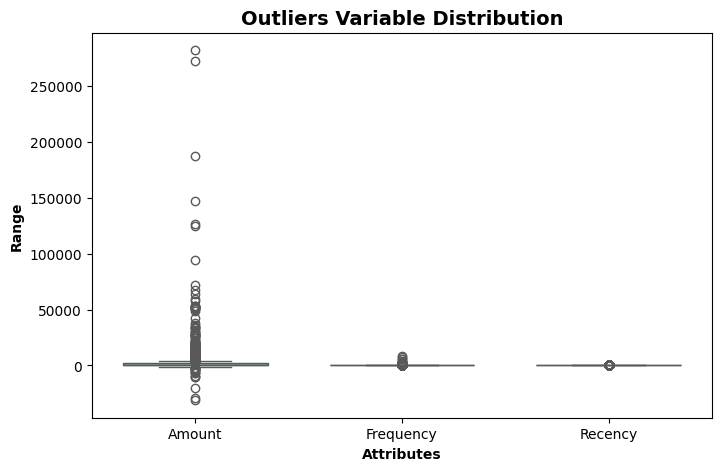

In [ ]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Berdasarkan hasil boxplot , pada amount memiliki banyak outlier yang berarti beberapa pelanggan memiliki pengeluaran jauh lebih besar dibandingan dengan sebagian besar pelanggan lainnya.

Untuk Frequency outlier lebih sedikit dibandingkan Amount, yang berarti beberapa pelanggan melakukan transaksi lebih sering dibandingkan mayoritas pelanggan lain

Untuk Recency juga lebih sedikit outliernya dan nilai recency lebih rendah daripada amount dan frequency yang berarti pelanggan lebih baru melakukan transaksi.

# Menghilangkan outlier secara statistik berdasrkan rentang interkuartil

In [ ]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]


1. Menghapus Outlier pada Amount

  Pada Q1 dan Q3 Menghitung kuartil 5% (Q1) dan kuartil 95% (Q3) dari kolom Amount. Dengan menggunakan persentil 5% dan 95% daripada persentil 25% dan 75%, mencoba menghilangkan outlier dengan metode yang lebih fleksibel, karena outlier sering kali terletak di ujung distribusi data. Kemudian menghitung rentang interkuartil(IQR) dengan menggunakan IQR = Q3 - Q1 . Setelah itu mengfilter yang di nilai amountnya diluar rentang yang dianggap outlier akan dihapus dari dataframe.

2. Menghapus Outlier pada Recency

  Menghitung Q1 dan Q3 untuk kolom Recency dengan persentil 5% dan 95%. IQR dihitung sebagai selisih antara Q3 dan Q1 untuk Recency. Menjaga nilai Recency dalam batas Q1 - 1.5 * IQR dan Q3 + 1.5 * IQR. Setelah itu nilai recency yang diluar rentang batas dihapus dari dataframe

3. Menghilangkan Outlier pada Frequency

  Menghitung Q1 dan Q3 untuk kolom Frequency dengan persentil 5% dan 95%. IQR untuk Frequency dihitung sebagai selisih antara Q3 dan Q1. Menjaga nilai Frequency dalam rentang Q1 - 1.5 * IQR dan Q3 + 1.5 * IQR. Setelah itu nilai frequency yang diluar rentang batas dihapus dari dataframe



Text(0.5, 0, 'Attributes')

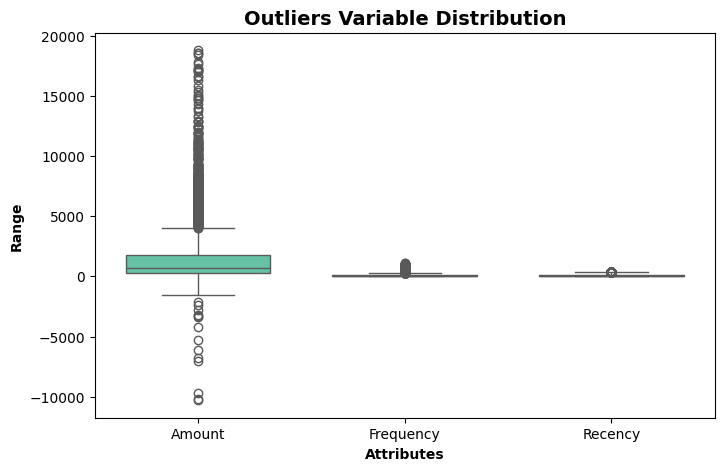

In [ ]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Berdasarkan output boxplot setelah outlier di filter pakai metode IQR masih ada beberapa outlier yang tersisa

# Rescaling atribut nilai pada kolom Amount, Frequency dan Recency

In [ ]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled

,Amount,Frequency,Recency
0,-0.642728,-0.660365,2.307015
1,1.142717,0.524519,-0.904683
2,0.751771,0.682504,-0.181060
3,0.085348,-0.192994,-0.736168
4,-0.504201,-0.561624,2.148413
...,...,...,...
4292,2.808264,1.465844,1.831208
4293,-0.609248,-0.627451,0.869681
4294,-0.569570,-0.587955,-0.845207
4295,0.225090,4.302983,-0.884858


Mengonversi hasil standarisasi(rescaling) data menjadi sebuah dataframe agar lebih mudah dibaca dan diolah.

## KMeans Clustering

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

Menentukan jumlah klaster yang dibentuk adalah 4 untuk melihat hasil awal dan kemudian mengoptimalkan berdasarkan metrik Silhouette Score atau Elbow Method. Dan mengatur jumlah iterasi maksimum di 50

In [ ]:
kmeans.labels_

array([1, 2, 2, ..., 0, 3, 0], dtype=int32)

Menampilkan array yang berisi klaster pada setiap titik data pada di dataset. Setiap elemen dalam array menunjukkan klaster (dari 0 hingga 3, karena n_clusters=4) yang sesuai untuk masing-masing pelanggan.

#### Finding the Optimal Number of Clusters
##### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

# Menampilkan Plot Elbow Curve

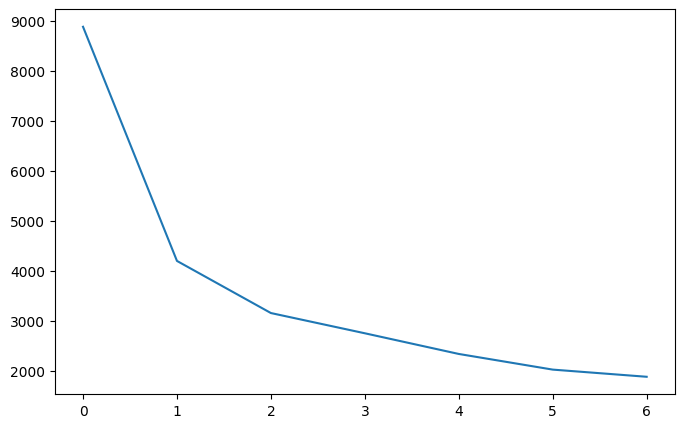

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

Elbow Curve untuk menentukan jumlah klaster jumlah klaster optimal dalam analisis K-means clustering. Berdasarkan hasil plot dapat disimpulkan bahwa 4 klaster mungkin merupakan jumlah klaster yang optimal untuk data ini, karena menambah klaster lebih dari 4 tidak secara signifikan mengurangi nilai SSD.

# Silhouette Analysis

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5988021228058636
For n_clusters=3, the silhouette score is 0.5308335851213531
For n_clusters=4, the silhouette score is 0.5146945440191507
For n_clusters=5, the silhouette score is 0.4523584736855338
For n_clusters=6, the silhouette score is 0.43883255333316434
For n_clusters=7, the silhouette score is 0.43246367463787894
For n_clusters=8, the silhouette score is 0.344308318041878


Untuk menghitung nilai skor Silhouette untuk berbagai jumlah klaster yang diuji pada data rfm_df_scaled. Silhouette Score adalah metrik yang digunakan untuk mengevaluasi kualitas klustering, di mana nilai yang lebih tinggi menunjukkan klaster yang lebih baik dan lebih terpisah.

Berdasarkan hasil nilai scorenya bahwa skor tertinggi di 3 klaster sebesar 0.5266. Yang berarti di 3 klaster adalah jumlah klaster yang paling optimal

# Menentukan klaster menjadi pakai 3 klaster

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

Mencoba menggunakan 3 klaster dan max iterasi 50

In [ ]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,3366.27,206,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


Menampilkan tabel yang telah ditambahkan kolom baru bernama Cluster_Id, yang berisi label klaster dari hasil K-means clustering.

# Menampilkan Boxplot untuk menunjukkan distribusi variabel Amount pada setiap klaster

<Axes: xlabel='Cluster_Id', ylabel='Amount'>

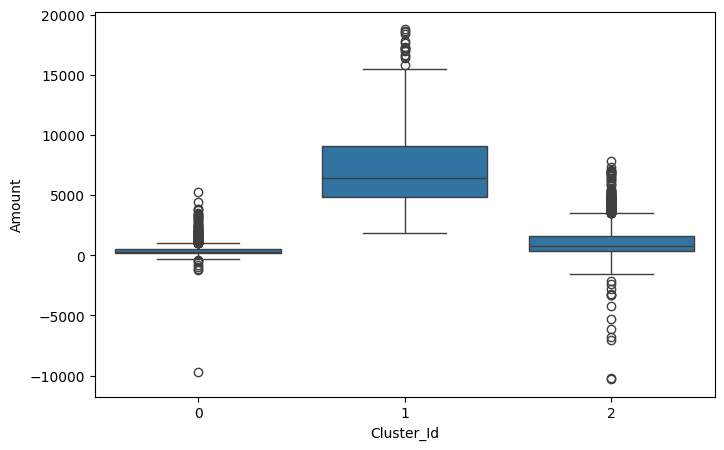

In [ ]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

Berdasarkan hasil boxplot dapat disimpulkan bahwa di klaster 2 miliki nilai Amount paling tinggi.

# Menampilkan Boxplot untuk menunjukkan distribusi variabel Frequency pada setiap klaster

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

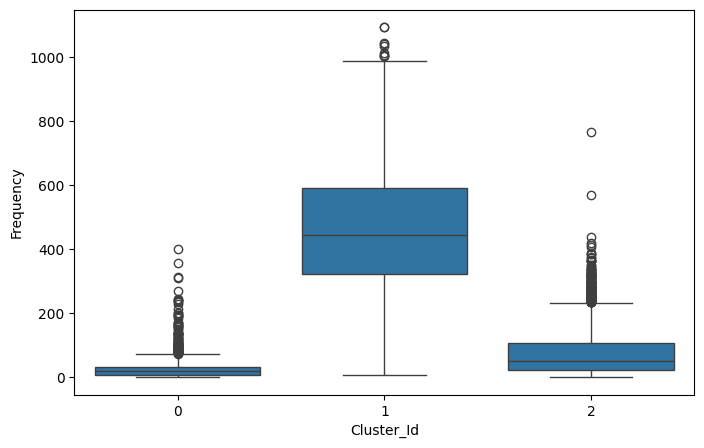

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

Berdasarkan hasil boxplot dapat disimpulkan bahwa di klaster 3 miliki nilai Frequency paling tinggi.

# Menampilkan Boxplot untuk menunjukkan distribusi variabel Recency pada setiap klaster

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

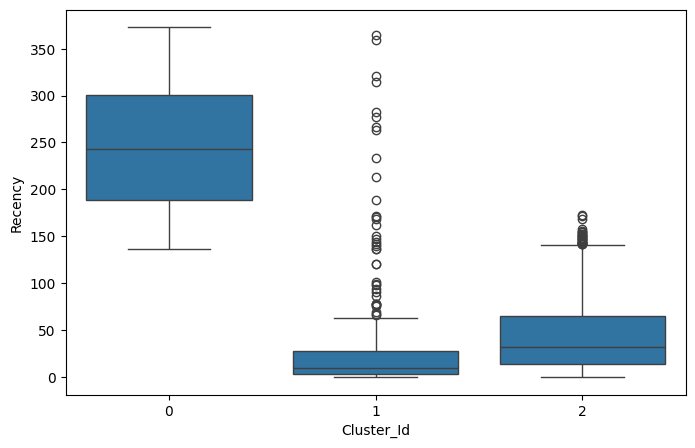

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

Berdasarkan hasil boxplot dapat disimpulkan bahwa di klaster 2 miliki nilai Recency paling tinggi.

### Hierarchical Clustering


# Menampilkan dendrogram Single linkage

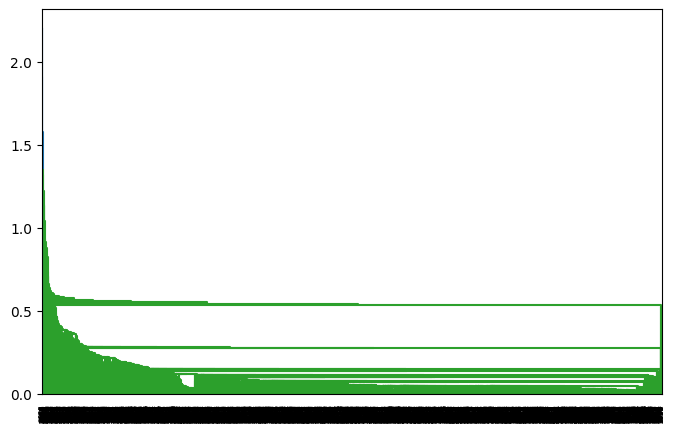

In [ ]:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Melakukan hierarchical clustering pada data rfm_df_scaled menggunakan metode single linkage (menghubungkan klaster berdasarkan jarak terdekat antara titik di masing-masing klaster) dan metrik euclidean untuk mengukur jarak antar titik. Kesimpulan berdasarkan hasil dendrogram bahwa data memiliki banyak kesamaan pada jarak kecil, tetapi metode single linkage menghasilkan struktur klaster yang tidak ideal untuk interpretasi yang jelas.

# Menampilkan dendrogram complete linkage

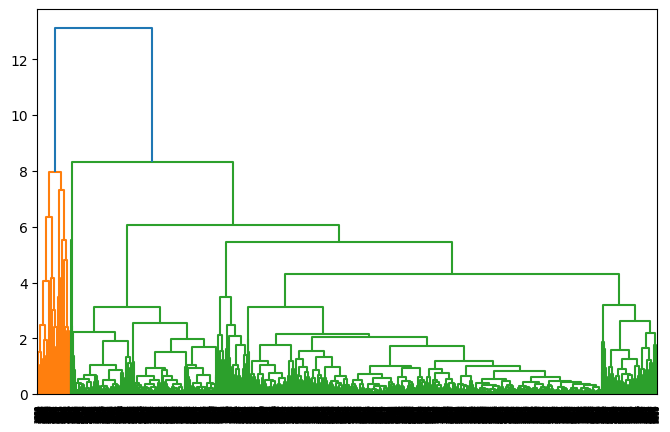

In [ ]:
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Melakukan hierarchical clustering pada data rfm_df_scaled menggunakan metode complete linkage dan metrik euclidean untuk mengukur jarak antar titik. Kesimpulan berdasarkan hasil dendrogram bahwa menunjukkan struktur klaster yang lebih jelas dan terpisah dibandingkan dengan single linkage sehingga dapat mempertimbangkan untuk menggunakan 3 hingga 4 klaster sebagai jumlah klaster optimal.

# Menampilkan dendrogram Average linkage

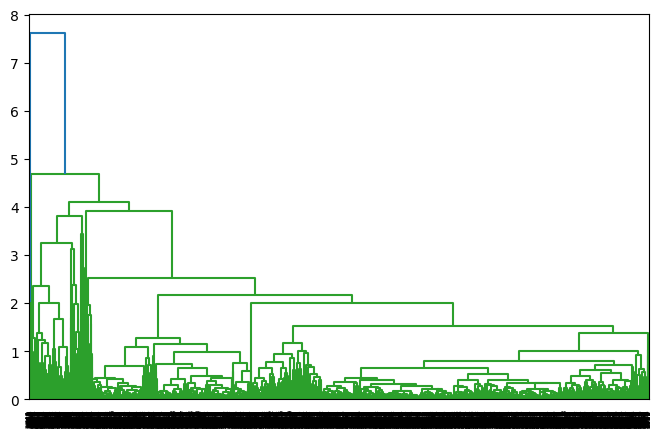

In [ ]:
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

Melakukan hierarchical clustering pada data rfm_df_scaled menggunakan metode average linkage dan metrik euclidean untuk mengukur jarak antar titik. Kesimpulannya bahwa menunjukkan struktur klaster yang lebih terorganisir dan berimbang atau teratur yang berarti data diorganisasi dengan baik dan klaster yang terbentuk cukup jelas.

#### Melakukan Cutting Dendrogram berdasarkan K


In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

Memotong dendrogram hasil hierarchical clustering membentuk 3 cluster

# Menghubungkan hasil clustering ke dataset asli rfm

In [ ]:
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,2,0
2,12348.0,3366.27,206,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,0,0


Hasil tabel yamg telah dihubungkan semua variabel rfm untuk mengetahui pelanggan mana yang termasuk dalam cluster tertentu.


# Menampilkan boxplot membandingkan distribusi Amount di setiap Cluster_Labels

<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

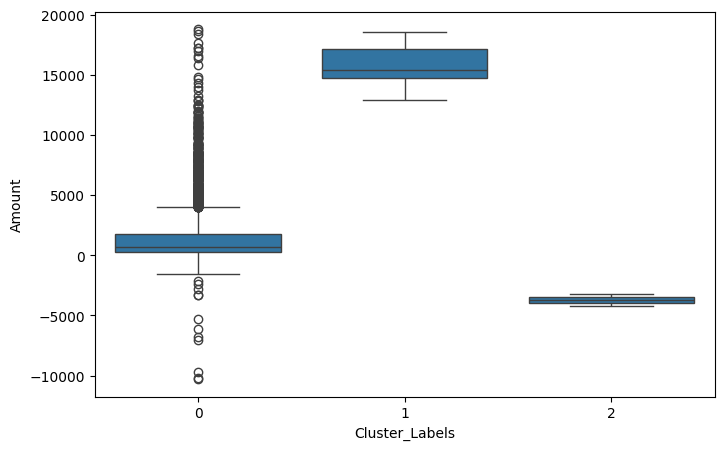

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

Dapat disimpulkan bahwa cluster 1 yang paling tinggi yang berarti merupakan kelompok pelanggan dengan nilai tertinggi untuk bisnis (pengeluaran besar). Cluster 2 memiliki pelanggan dengan pengeluaran rendah dan kemungkinan kontribusi kecil terhadap pendapatan. Cluster 0 memiliki variasi besar dalam pengeluaran, termasuk banyak pelanggan dengan pengeluaran kecil dan beberapa pelanggan dengan pengeluaran tinggi.

# Menampilkan boxplot membandingkan distribusi Frequency di setiap Cluster_Labels

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

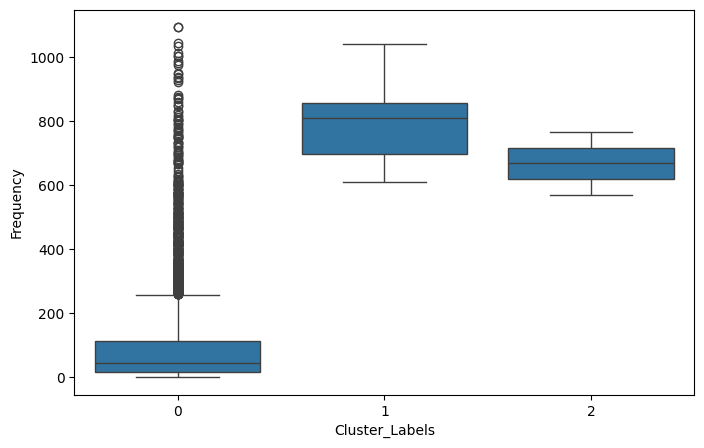

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

Dapat disimpulkan bahwa cluster 0 Memiliki banyak outlier, artinya ada beberapa pelanggan yang melakukan pembelian dengan frekuensi sangat tinggi. Cluster 1 memiliki pelanggan dengan frekuensi pembelian yang tinggi secara konsisten. Cluster 2 pada pelanggan memiliki frekuensi pembelian yang sedang hingga rendah, tetapi lebih seragam.

# Menampilkan boxplot membandingkan distribusi Recency di setiap Cluster_Labels

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

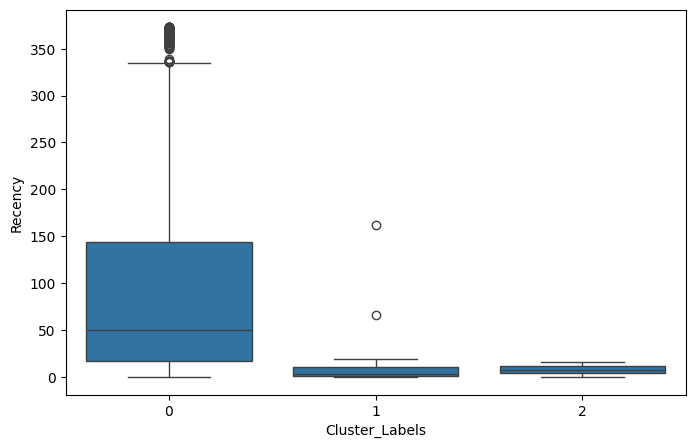

In [ ]:
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

Dapat disimpulkan bahwa Cluster 0 Memiliki nilai Recency yang lebih tinggi secara signifikan dibanding cluster lain. Cluster 1 memiliki nilai Recency rendah, menunjukkan bahwa pelanggan dalam cluster ini melakukan transaksi terakhir baru-baru ini. Cluster 2 Nilai Recency juga rendah, tetapi lebih seragam dibanding Cluster.

## Kesimpulan


K-Means Clustering dengan 3 Cluster bahwa:

Cluster 1 adalah pelanggan dengan jumlah transaksi yang tinggi dibandingkan dengan pelanggan lain.

Dan Cluster 1 adalah pembeli tetap.

Pelanggan Cluster 2 bukanlah pembeli terkini dan karenanya kurang penting dari sudut pandang bisnis.


Hierarchical Clustering dengan 3 Cluster bahwa:

Cluster 2 adalah pelanggan dengan jumlah transaksi yang tinggi dibandingkan dengan pelanggan lain.

Dan Cluster 2 adalah pembeli tetap.

Cluster 0 bukanlah pembeli terkini dan karenanya kurang penting dari sudut pandang bisnis.

